<a href="https://colab.research.google.com/github/lidjud/python_sem_24-1/blob/main/Proyecto_2024_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Explora, pre-procesa y analiza un conjunto de datos reales.**

#Objetivos

1. Importar un conjunto de datos.
2. Prepararlos para análisis.
3. Analizar y extraer carácteristicas específicas de los datos.
4. Generar gráficas para visualizar los resultados.

Fuente de Datos: [International migration flows to and from selected countries - The 2015 revision](https://www.un.org/development/desa/pd/data/international-migration-flows).

Los datos son registros de la Organización de las Naciones Unidas de flujos migratorios internacionales. En estos datos se registran las entradas como las salidas de los viajeros incluyendo lugar de nacimiento, ciudadanía o lugar de residencia anterior/siguiente tanto para extranjeros como para nacionales. El link anterior contiene datos pertenecientes a 45 países.

Para este proyecto, nos centraremos únicamente en inmigración canadiense.

![Data Preview](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/Module%201/images/DataSnapshot.png)

El conjunto de datos de inmigración de Canadá se puede obtener de <a href="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.xlsx">aquí</a>.

In [ ]:
#Iniciaremos importando las librerías que vamos a utilizar
import numpy as np
import pandas as pd

In [ ]:
from google.colab import files #Importamos el archivo de excel

uploaded = files.upload()

In [ ]:
#Utilizamos el alias de pandas para extraer un achivo en excel
df_can = pd.read_excel(
    'Canada.xlsx',
    sheet_name='Canada by Citizenship',
    skiprows=range(20),
    skipfooter=2)

print('Dataframe ready!')

Veamos las 5 filas superiores del conjunto de datos usando la función head().

In [ ]:
df_can.head()

También podemos ver las 5 filas inferiores del conjunto de datos usando la función `tail()`.

In [ ]:
df_can.tail()

Para obtener la lista de encabezados de columna, podemos recurrir a la variable de instancia de columnas del marco de datos.

In [ ]:
df_can.columns

De manera similar, para obtener la lista de índices usamos las variables de instancia .index.

In [ ]:
df_can.index

Para obtener las columnas como listas, podemos usar el método tolist().

In [ ]:
df_can.columns.tolist()

In [ ]:
#Cambiemos los nombres de las columnas de tipo entero a texto
df_can.columns = list(map(str, df_can.columns))

In [ ]:
df_can.columns.tolist()

Para ver las dimensiones del marco de datos, usamos la variable de instancia de forma del mismo.

In [ ]:
# size of dataframe (rows, columns)
df_can.shape

Limpia el conjunto de datos para eliminar algunas columnas innecesarias. Podemos usar el método pandas `drop()` de la siguiente manera:

In [ ]:
# En pandas axis=0 represents rows (default) and axis=1 represents columns.
df_can.drop(['AREA','REG','DEV','Type','Coverage','RegName','DevName'], axis=1, inplace=True)
df_can.head(2)

Cambia el nombre de las columnas para que tengan sentido. Usa el método `rename()` pasando un diccionario de nombres antiguos y nuevos de la siguiente manera:

In [ ]:
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent'}, inplace=True)
df_can.columns

In [ ]:
#Vamos a crear un nuevo dataframe llamada df a partir de df_can. Seleccionaremos Country, Continent y, los años 1980 y 1981
df = df_can[['Country', 'Continent', "1980", "1981"]]
df

In [ ]:
# Con la siguiente instrucción selecccionamos una columna en específico y la convertimos a una lista
df_1980 = list(df['1980'])

#**Ejercicio número 1**

1. A partir del dataframe `df_can` crea un nuevo dataframe que contenga los campos:

  a. Country

  b. Continent

  c. Años del 2001 a 2010

2. Crea una lista que contenga los datos de la columna Country

3. Crea una lista para cada uno de los años del 2001 al 2010

4. Crea una nueva lista que sume las listas anteriores elemento por elemento (fíjate en el siguiente ejemplo)

In [ ]:
#Creo una nueva lista que corresponde al año 1981
df_1981 = list(df['1981'])

In [ ]:
#Reviso la longitud de cada una de las litas que generé, así como los primiero 5 elementos
print(len(df_1980))
print(len(df_1981))
print(df_1980[:5])
print(df_1981[:5])

In [ ]:
# Creo una sola lista con la suma de las dos listas (1980 y 1981) elemento por elemento y visualizo los primeros 5 elementos de la lista nueva.
# Usa el método append y los ciclos for que consideres necesarios.
# Importante: No puedes usar ningún otro método o función
# Ejemplo:

total_year = []

for i in range(len(df_1980)):
  total_year.append(df_1980[i])
for i in range(len(df_1981)):
  total_year[i] = total_year[i]+df_1981[i]

print(total_year[:5])

In [ ]:
# A partir de aquí realiza el código del ejercicio 1, puedes usar las celdas que sean necesarias.

#**Ejercicio número 2**

De la lista nueva que creaste en el punto 4 del ejercicio 1, realiza lo siguiente:

1. Crea un algoritmo que te permita ordenar de menor a mayor los valores que contiene la lista.

2. Una vez ordenada la lista del punto 1 de este ejercicio, crea una nueva lista que contenga los últimos 20 elementos de esta misma lista ordenada.

Importante: Utiliza dos ciclos for, uno anidado en otro.

**No debes usar ningún método o función que ya esté programado en python que haga el ordenamiento**.

In [ ]:
# Código para el ejercicio número 2

Vamos a graficar!

In [ ]:
#Importamos las librerías necesarias para graficar
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#Aquí puedes seleccionar un estilo para tus gráficas
print(plt.style.available)
mpl.style.use(['ggplot']) #Seleccioné ggplot

#**Ejercicio número 3**

Gráfica los valores de la última lista que generaste

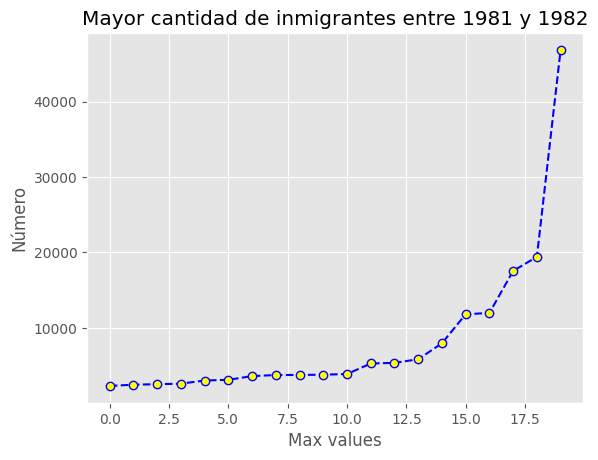

In [ ]:
# Gráfica los 20 elementos de tu nueva lista. Puedes usar el siguiente ejemplo:
plt.plot(new_list, "ob--", mfc = "yellow")
# El primer argumento de la línea anterior hace referencia a la última lista generada,
# El segundo argumento indica que queremos marcas "o" en cada punto de la gráfica y líneas ("---") de color azul
# El tercer argumento es el color del relleno de las marcas

plt.xlabel('Max values')
plt.ylabel('Número')
plt.title("Mayor cantidad de inmigrantes entre 1981 y 1982")

plt.show()

In [ ]:
# Código para el ejercicio 3

#**Ejercicio número 4**

1. Crea un diccionario que contenga las siguientes listas: Country, años del 2001 a 2010, Total (lista del ejercicio 1, punto número 4)

2. A partir de tu diccionario, crea un nuevo dataframe que se llame df_new. Fíjate en el siguiente ejemplo.

In [ ]:
dict_new = {'Country': df_country, '1980': df_1980, '1981': df_1981, 'Total': total_year}

df_new = pd.DataFrame(dict_new)

In [ ]:
# Código para el ejercicio 4

Intentemos filtrar por la lista de países ("Country"). Fíjate en el siguiente ejemplo.

In [ ]:
df_new.set_index('Country', inplace=True)
df_new.head(3)

,1980,1981,Total
Country,,,
Afghanistan,16,39,0
Albania,1,0,0
Algeria,80,67,0


Clasifiquemos el marco de datos `df_new` en la columna `'Total'` en orden descendente para descubrir los 5 países que más contribuyeron a la inmigración a Canadá en 1980 y 1981.

In [ ]:
df_new.sort_values(by='Total', ascending=False, axis=0, inplace=True)
top_5 = df_new.head(5)
top_5

,1980,1981,Total
Country,,,
Zimbabwe,72,114,46841
Zambia,11,17,19408
Yemen,1,2,17550
Western Sahara,0,0,11972
Viet Nam,1191,1829,11805


#**Ejercicio número 5**
Descubre los 5 países que más contribuyeron a la inmigración a Canadá de los años 2001 a 2010.
Muestra los nombres de los países con el recuento de inmigrantes del total (número de inmigrantes del año 2001 a 2010).

In [ ]:
# Código para el ejercicio 5

#**Ejercicio número 6**

1. Realiza una gráfica de pie que nos permita ver los valores de los países que más contribuyeron a la inmigración del 2001 al 2010.

2. Etiqueta por país cada una de las fracciones de la gráfica.

In [ ]:
# Código para el ejercicio número 6

#**Ejercicio número 7**

Realiza el código para que el usuario visualice los resultado.
Para ello, realiza un menú con los siguientes indicadores.

1. Bienvenida. Describe brevemente de qué trata el programa.

2. Despliega el siguiente menú.

  a. Tabla de los primeros 15 elementos de la lista del archivo original.

  b. Gráfica que contiene unicamente los 20 valores más altos del total de inmigrantes por país que llegaron a Canadá entre el 2001 y el 2010.

  c. Tabla del top 5 de los países de los inmigrantes que llegaron a Canadá entre el 2001 y el 2010.

  d. Gráfica del top 5 de los países de los inmigrantes que llegaron a Canadá entre el 2001 y el 2010.

  e. Salir.

3. El usuario deberá seleccionar una opción (letra o palabra) del menú las veces que lo solicite. No debe importar si la letra es mayúscula o minúscula. Si selecciona una opción que no se encuentra en el menú, solicitar al usuario que seleccione otra opción del menú.

In [ ]:
# Código para el ejercicio 7

🙂 Gracias!